# Classification MNIST avec CNN

Cet exercice consiste à développer un modèle de réseau de neurones convolutionnel (CNN) pour classer les images de chiffres manuscrits du dataset MNIST.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

## 1. Chargement du Dataset MNIST

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

print(f"Forme des images d'entraînement: {train_images.shape}")
print(f"Forme des étiquettes d'entraînement: {train_labels.shape}")
print(f"Forme des images de test: {test_images.shape}")
print(f"Forme des étiquettes de test: {test_labels.shape}")
print(f"Valeurs des pixels (min, max): ({train_images.min()}, {train_images.max()})")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Forme des images d'entraînement: (60000, 28, 28)
Forme des étiquettes d'entraînement: (60000,)
Forme des images de test: (10000, 28, 28)
Forme des étiquettes de test: (10000,)
Valeurs des pixels (min, max): (0, 255)


## 2. Prétraitement des Données

In [ ]:
# Normalisation des images (division par 255.0 pour obtenir des valeurs entre 0 et 1)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Ajout de la dimension de channel pour la compatibilité avec Conv2D
# Transformation de (60000, 28, 28) en (60000, 28, 28, 1)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

print(f"Forme des images d'entraînement après prétraitement: {train_images.shape}")
print(f"Forme des images de test après prétraitement: {test_images.shape}")
print(f"Valeurs des pixels après normalisation (min, max): ({train_images.min()}, {train_images.max()})")

Forme des images d'entraînement après prétraitement: (60000, 28, 28, 1)
Forme des images de test après prétraitement: (10000, 28, 28, 1)
Valeurs des pixels après normalisation (min, max): (0.0, 1.0)


## 3. Conception du Modèle CNN

In [ ]:
# Construction du modèle CNN
model = models.Sequential([
    layers.Conv2D(5, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(20, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(30, kernel_size=(3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 5)      │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 20)     │           920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 30)       │         5,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 270)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        13,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,460 (79.92 KB)

 Trainable params: 20,460 (79.92 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Compilation du Modèle

In [ ]:
# Compilation du modèle
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## 5. Entraînement du Modèle

In [ ]:

history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    validation_data=(test_images, test_labels),
    verbose=1
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.8250 - loss: 0.5546 - val_accuracy: 0.9795 - val_loss: 0.0667
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9755 - loss: 0.0795 - val_accuracy: 0.9809 - val_loss: 0.0613
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9826 - loss: 0.0553 - val_accuracy: 0.9847 - val_loss: 0.0430
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9861 - loss: 0.0436 - val_accuracy: 0.9762 - val_loss: 0.0719
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9888 - loss: 0.0350 - val_accuracy: 0.9886 - val_loss: 0.0345


## 6. Évaluation du Modèle et Visualisation des Résultats

In [ ]:

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"\nPrécision sur l'ensemble de test: {test_acc:.4f}")
print(f"Perte sur l'ensemble de test: {test_loss:.4f}")


Précision sur l'ensemble de test: 0.9886
Perte sur l'ensemble de test: 0.0345


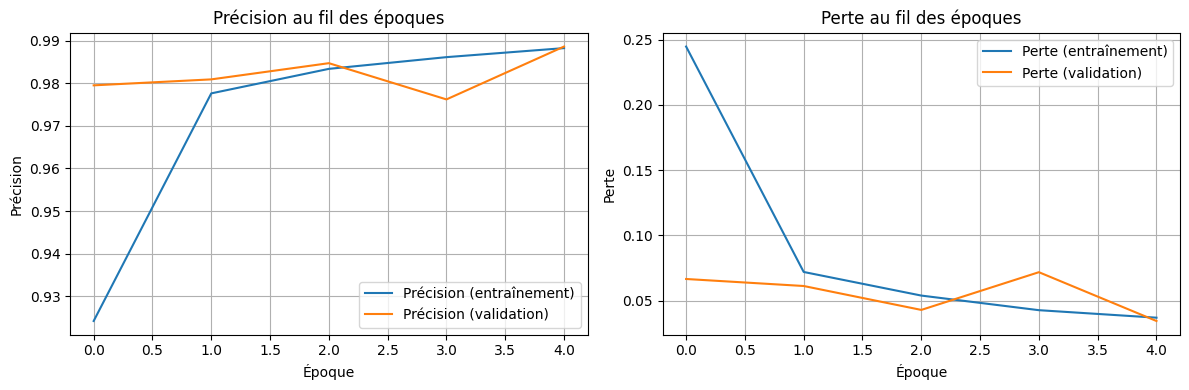

In [ ]:

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Précision (entraînement)')
plt.plot(history.history['val_accuracy'], label='Précision (validation)')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.title('Précision au fil des époques')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perte (entraînement)')
plt.plot(history.history['val_loss'], label='Perte (validation)')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.title('Perte au fil des époques')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


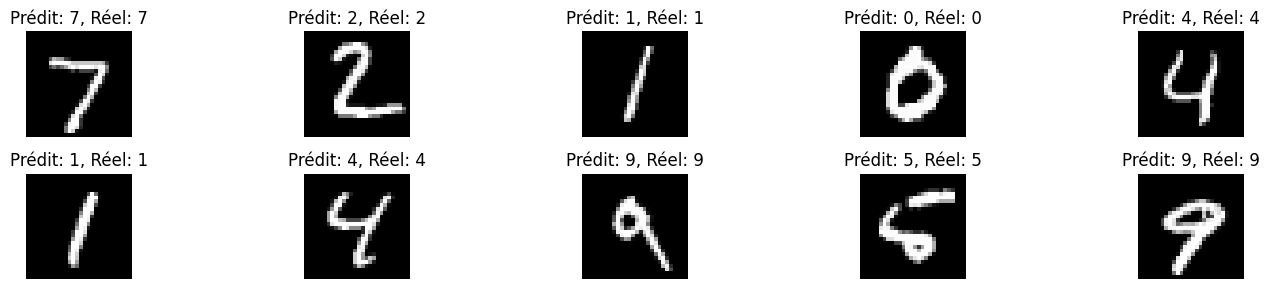

In [ ]:
predictions = model.predict(test_images[:10])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Prédit: {predicted_labels[i]}, Réel: {test_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
model.save('modelnumber.h5')